In [51]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Start by importing the K-means algorithm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data.csv to cleaned_data (1).csv


In [47]:
path = "cleaned_data (1).csv"
# path ="Book1.csv"
gw_df = pd.read_csv(io.BytesIO(uploaded[path]))
print(gw_df.head())

     Country  Year  Temperature_Anomaly  CO2_Emissions    Population  \
0  Country_1  1900            -0.335027   3.984644e+08  3.750466e+08   
1  Country_1  1901             0.170373   8.440511e+08  1.001558e+09   
2  Country_1  1902             0.448391   7.090039e+08  3.604418e+08   
3  Country_1  1903             1.254878   7.388654e+08  9.164562e+08   
4  Country_1  1904             0.455433   5.804757e+08  4.870284e+08   

   Forest_Area           GDP  Renewable_Energy_Usage  Methane_Emissions  \
0    27.856810  4.573252e+12               60.185651       5.169077e+06   
1    69.848395  4.868018e+12               39.525191       2.619170e+06   
2    50.116560  5.464041e+12               71.867926       6.380284e+06   
3    68.083451  4.415206e+12               45.673511       5.175568e+06   
4    21.907529  5.453627e+12               55.241938       3.343214e+06   

   Sea_Level_Rise  ...  Waste_Management  Per_Capita_Emissions  \
0       24.478590  ...         73.044383          

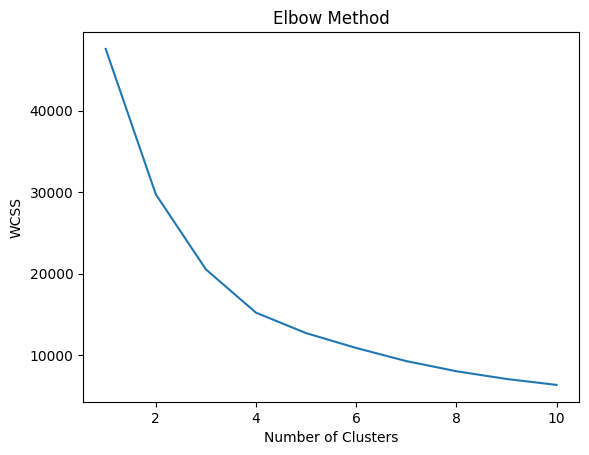

In [48]:
# Preprocess the data (assuming 'Average_Temperature ' and 'Year' columns are numeric and relevant)
X = gw_df[['Average_Temperature', 'Year']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Silhouette Score: 0.33958462745570817


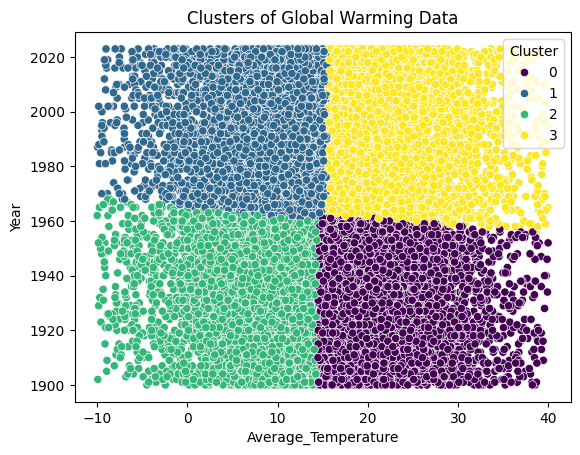

In [52]:
# Based on the elbow plot, choose the optimal number of clusters (e.g., 4)
optimal_k = 4 # Replace with your chosen k

# Fit K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
gw_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Evaluate the KMeans model
silhouette_avg = silhouette_score(X_scaled, gw_df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# A Silhouette Score of 0.33958 indicates that the k-means clustering model is performing moderately, but there's definitely room for improvement.
# Visualize the clusters
sns.scatterplot(x='Average_Temperature', y='Year', hue='Cluster', data=gw_df, palette='viridis') # Changed to existing column names
plt.title('Clusters of Global Warming Data')
plt.xlabel('Average_Temperature') # Changed to existing column name
plt.ylabel('Year') # Changed to existing column name
plt.show()

In [ ]:
# Clean column names
gw_df.columns = gw_df.columns.str.strip().str.lower()

# Define expected columns and filter dataframe, also convert to lowercase
expected_columns = ["year", "extreme_weather_events", "co2_emissions", "population", "fossil_fuel_usage"]
gw_df = gw_df[expected_columns]
gw_df.head()

,year,extreme_weather_events,co2_emissions,population,fossil_fuel_usage
0,1900,26.750000,3.984644e+08,3.750466e+08,52.427376
1,1901,27.000000,8.440511e+08,1.001558e+09,76.355544
2,1902,27.333333,7.090039e+08,3.604418e+08,57.531928
3,1903,26.750000,7.388654e+08,9.164562e+08,45.270020
4,1904,33.000000,5.804757e+08,4.870284e+08,39.504759


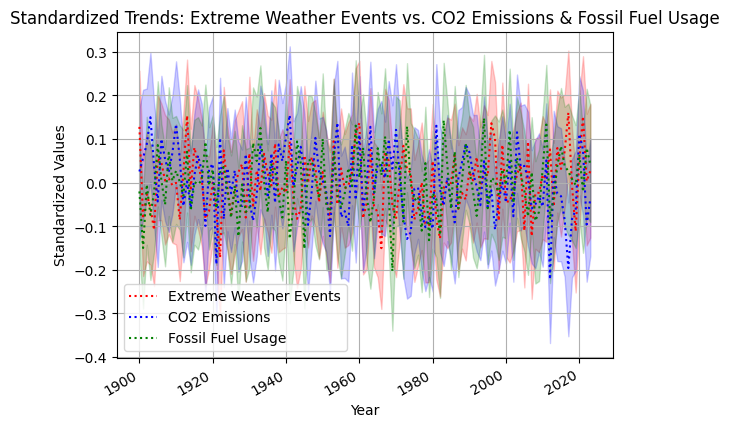


Correlation Matrix:
                             year  extreme_weather_events  co2_emissions  \
year                    1.000000                0.005772      -0.019691   
extreme_weather_events  0.005772                1.000000      -0.005101   
co2_emissions          -0.019691               -0.005101       1.000000   
population             -0.010579                0.000329      -0.001896   
fossil_fuel_usage       0.006768                0.003854       0.000042   

                        population  fossil_fuel_usage  
year                     -0.010579           0.006768  
extreme_weather_events    0.000329           0.003854  
co2_emissions            -0.001896           0.000042  
population                1.000000          -0.011150  
fossil_fuel_usage        -0.011150           1.000000  


In [ ]:

# Standardize the data (excluding Year)
scaler = StandardScaler()
# Updated numerical_features to match lowercase column names in the DataFrame
numerical_features = ["extreme_weather_events", "co2_emissions", "population", "fossil_fuel_usage"]
# List of numerical columns to be scaled
gw_df_scaled = gw_df.copy() # Create a copy to avoid modifying the original DataFrame
gw_df_scaled[numerical_features] = scaler.fit_transform(gw_df[numerical_features]) #Apply scaler to numerical features only


# Plot standardized trends
fig, ax = plt.subplots()  # Create a figure and an axes object

sns.lineplot(data=gw_df_scaled, x="year", y="extreme_weather_events",
             label="Extreme Weather Events", linestyle="dotted", color="red", ax=ax)
sns.lineplot(data=gw_df_scaled, x="year", y="co2_emissions",
             label="CO2 Emissions", linestyle="dotted", color="blue", ax=ax)
sns.lineplot(data=gw_df_scaled, x="year", y="fossil_fuel_usage",
             label="Fossil Fuel Usage", linestyle="dotted", color="green", ax=ax)

# Enhancements
plt.title("Standardized Trends: Extreme Weather Events vs. CO2 Emissions & Fossil Fuel Usage")
plt.xlabel("Year")
plt.ylabel("Standardized Values")
plt.legend()
plt.grid(True)

# Format x-axis to show year as four digits
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
fig.autofmt_xdate()  # Rotate x-axis labels for better readability

# Show plot
plt.show()

# Correlation Analysis
correlation_matrix = gw_df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

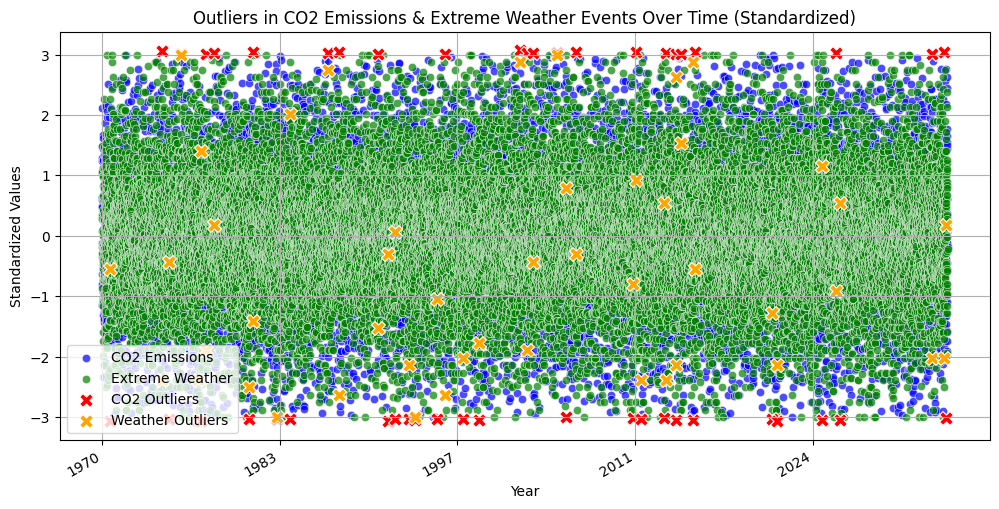

In [ ]:
features = ["CO2_Emissions", "Extreme_Weather_Events"]
gw_df = gw_df[features].dropna()

### Standardize Data ###
scaler = StandardScaler()
gw_df_scaled = pd.DataFrame(scaler.fit_transform(gw_df), columns=features, index=gw_df.index)

### Z-SCORE METHOD ###
# Calculate Z-scores
gw_df_scaled["CO2_Zscore"] = np.abs(zscore(gw_df_scaled["CO2_Emissions"]))
gw_df_scaled["Extreme_Weather_Zscore"] = np.abs(zscore(gw_df_scaled["Extreme_Weather_Events"]))

# Identify outliers (Z-score > 3)
gw_df_scaled["CO2_Anomaly"] = gw_df_scaled["CO2_Zscore"] > 3
gw_df_scaled["Extreme_Weather_Anomaly"] = gw_df_scaled["Extreme_Weather_Zscore"] > 3

### ISOLATION FOREST METHOD ###
iso_forest = IsolationForest(contamination=0.05, random_state=42)
gw_df_scaled["Anomaly_Score"] = iso_forest.fit_predict(gw_df_scaled[["CO2_Emissions", "Extreme_Weather_Events"]])

# Convert Isolation Forest output to Boolean (1=Normal, -1=Anomaly)
gw_df_scaled["IF_Anomaly"] = gw_df_scaled["Anomaly_Score"] == -1

### PLOT ANOMALIES ###
plt.figure(figsize=(12, 6))

# Plot normal points
sns.scatterplot(x=gw_df_scaled.index, y=gw_df_scaled["CO2_Emissions"], label="CO2 Emissions", color="blue", alpha=0.7)
sns.scatterplot(x=gw_df_scaled.index, y=gw_df_scaled["Extreme_Weather_Events"], label="Extreme Weather", color="green", alpha=0.7)

# Highlight anomalies
anomalies = gw_df_scaled[(gw_df_scaled["CO2_Anomaly"]) | (gw_df_scaled["Extreme_Weather_Anomaly"])]
sns.scatterplot(x=anomalies.index, y=anomalies["CO2_Emissions"], color="red", label="CO2 Outliers", marker="X", s=100)
sns.scatterplot(x=anomalies.index, y=anomalies["Extreme_Weather_Events"], color="orange", label="Weather Outliers", marker="X", s=100)

# Plot Enhancements
plt.title("Outliers in CO2 Emissions & Extreme Weather Events Over Time (Standardized)")
plt.xlabel("Year")
plt.ylabel("Standardized Values")
plt.legend()
plt.grid(True)
# Format x-axis to show year as four digits
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()  # Rotate x-axis labels for better readability if needed

plt.show()

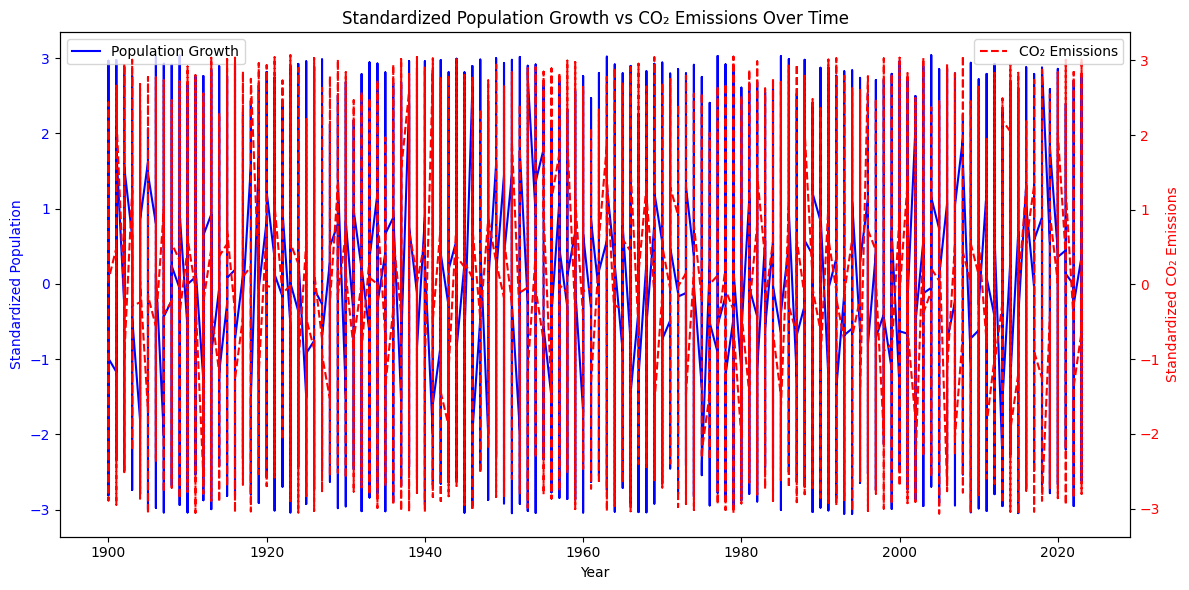

In [ ]:
# Reload the dataframe and clean column names
gw_df = pd.read_csv(io.BytesIO(uploaded[path]))
gw_df.columns = gw_df.columns.str.strip().str.lower()  # Remove leading/trailing spaces and convert to lowercase

# Define expected columns, ensuring they match the case after cleaning (lowercase)
expected_columns = ["year", "extreme_weather_events", "co2_emissions", "population", "fossil_fuel_usage"]
gw_df = gw_df[expected_columns]

# Convert "year" to datetime and sort
gw_df["year"] = pd.to_datetime(gw_df["year"], format="%Y")
gw_df.sort_values("year", inplace=True)

# Apply StandardScaler to Population and CO2_Emissions # 'CO2_Emissions' changed to 'co2_emissions'
scaler = StandardScaler()
gw_df_scaled = gw_df.copy()
gw_df_scaled[["population", "co2_emissions"]] = scaler.fit_transform(gw_df[["population", "co2_emissions"]]) # 'Population' and 'CO2_Emissions' changed to 'population' and 'co2_emissions' respectively

# Create figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Standardized Population Growth # 'Population' changed to 'population'
ax1.set_xlabel("Year")
ax1.set_ylabel("Standardized Population", color="blue")
ax1.plot(gw_df["year"], gw_df_scaled["population"], color="blue", label="Population Growth") # 'Year' and 'Population' changed to 'year' and 'population' respectively
ax1.tick_params(axis="y", labelcolor="blue")

# Create secondary y-axis for CO₂ Emissions # 'CO2_Emissions' changed to 'co2_emissions'
ax2 = ax1.twinx()
ax2.set_ylabel("Standardized CO₂ Emissions", color="red")
ax2.plot(gw_df["year"], gw_df_scaled["co2_emissions"], linestyle="dashed", color="red", label="CO₂ Emissions")  # 'Year' and 'CO2_Emissions' changed to 'year' and 'co2_emissions' respectively
ax2.tick_params(axis="y", labelcolor="red")

# Title and legend
plt.title("Standardized Population Growth vs CO₂ Emissions Over Time")
fig.tight_layout()
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show plot
plt.show()